# Read images and compute different color embeddings

In [1]:
import os
import json

DATASETS_FOLDER = '..\..\..'
MARKUP_JSON = os.path.join(DATASETS_FOLDER, 'merged_markup.json')

with open(MARKUP_JSON) as f:
    markup_data = json.load(f)

img_paths = []
for dataset_part in markup_data.keys():
        markup = markup_data[dataset_part]
        img_paths.extend(
            [
                os.path.join(DATASETS_FOLDER, dataset_part, img_name)
                for img_name in markup.keys()
            ]
        )

In [2]:
import sys
sys.path.append('..')

from src.render import show_examples, segment_moto_on_image
from src import Processing

DATASET_PART_FOLDER = r"C:\Users\Ася\Desktop\Папки\Учёба\project_FotoMoto\8.06(2)MOTORING_25.06.22 JPG"

processor = Processing(DATASET_PART_FOLDER)

In [3]:
processed_masks, image = processor.get_processed_masks_on_image(img_paths[0])
len(processed_masks)

2

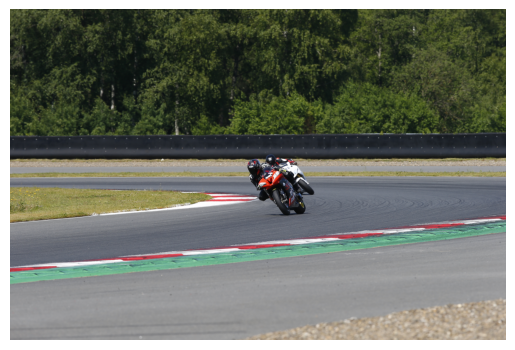

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.axis('off')
plt.imshow(image)
plt.show()

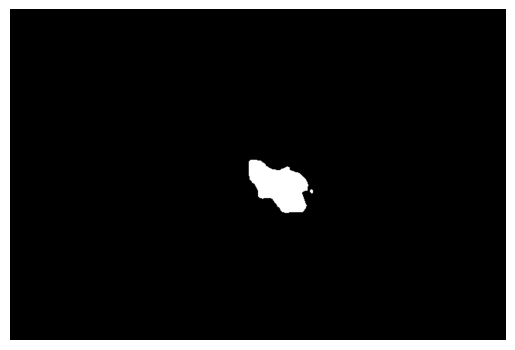

In [5]:
plt.axis('off')
plt.imshow(processed_masks[0])
plt.show()

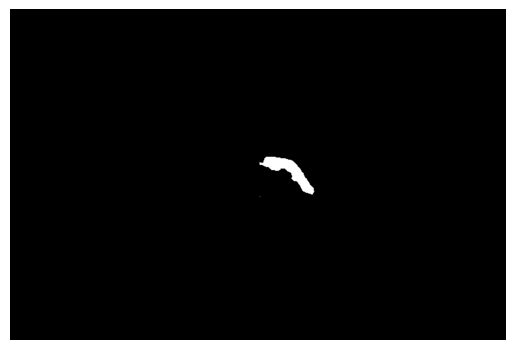

In [6]:
plt.axis('off')
plt.imshow(processed_masks[1])
plt.show()

# Separate channels

In [7]:
import numpy as np
import cv2

def plot_mask_histograms_by_separate_channels(
    rgb_img, moto_mask, hsv_flag=True,
    intervals_count=256
):
    image = rgb_img.copy()
    if hsv_flag:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        
    _, _, channels = image.shape
    
    for channel_id in range(channels):
        H, bins = np.histogram(
            image[:, :, channel_id], bins=intervals_count - 1, range=(0,255),
            density=False, weights=moto_mask[:, :, channel_id]
        )
        plt.bar(bins[:-1],H,width=1)
        plt.title(f'Color histogram for {"RGB"[channel_id] if not hsv_flag else "HSV"[channel_id]} channel')
        plt.show()


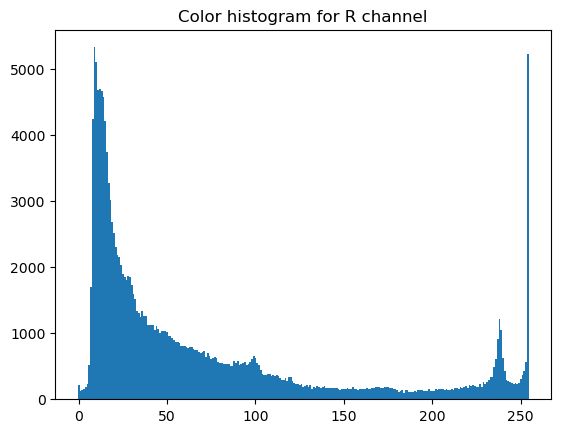

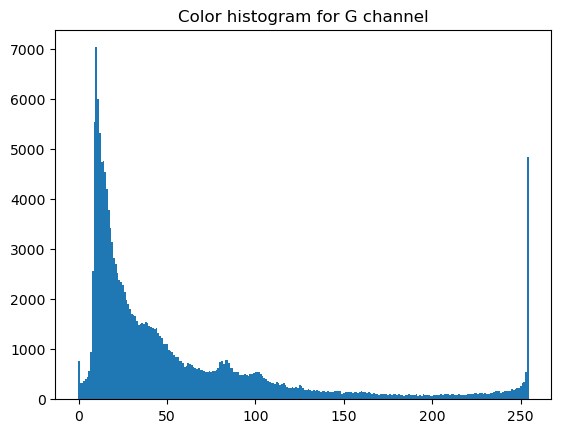

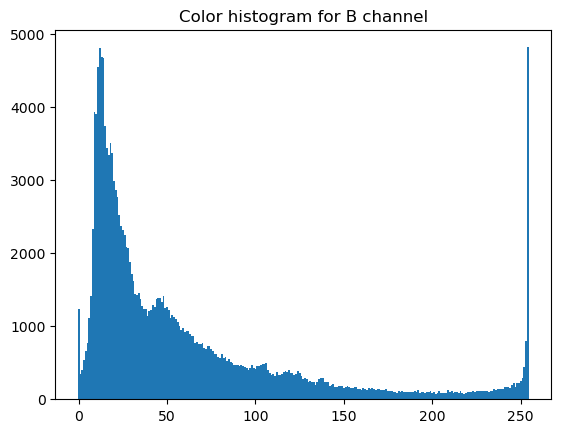

In [8]:
plot_mask_histograms_by_separate_channels(image, processed_masks[0], hsv_flag=False)

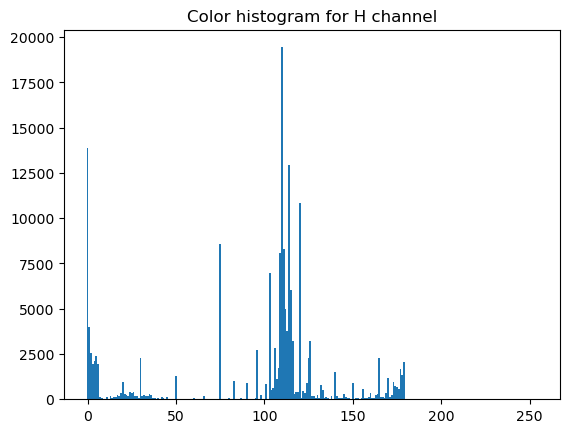

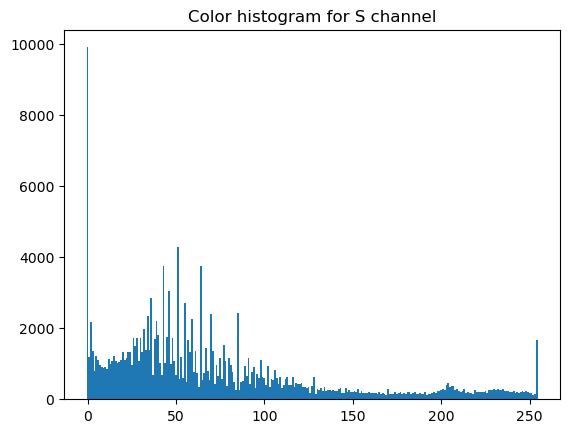

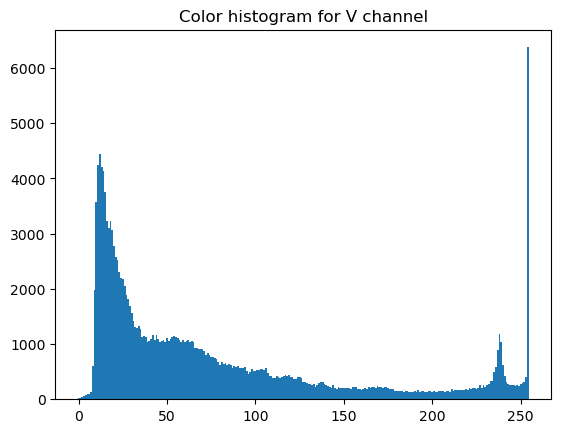

In [9]:
plot_mask_histograms_by_separate_channels(image, processed_masks[0], hsv_flag=True)

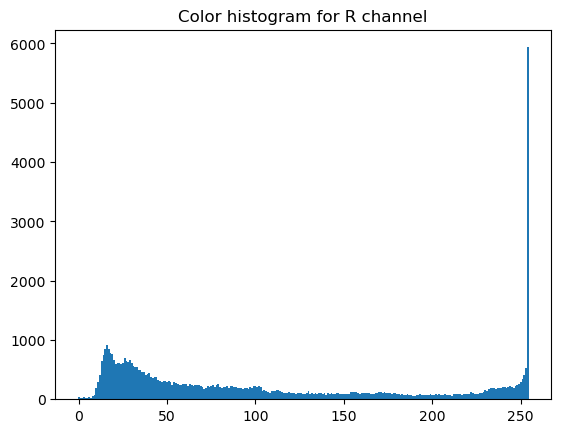

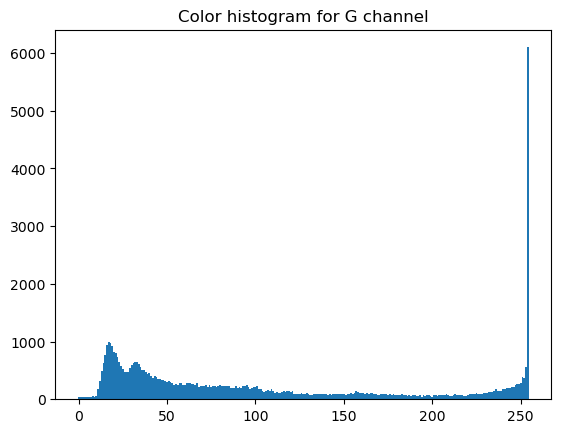

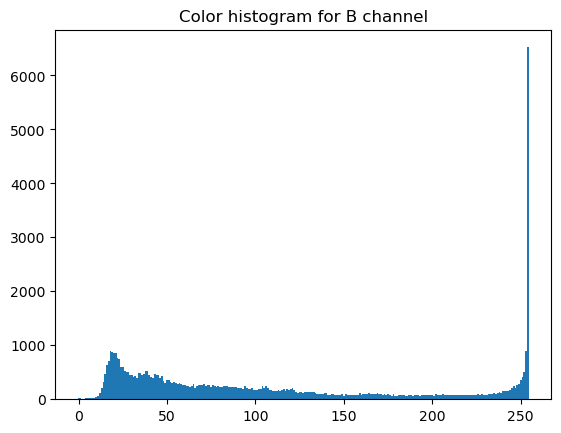

In [10]:
plot_mask_histograms_by_separate_channels(image, processed_masks[1], hsv_flag=False)

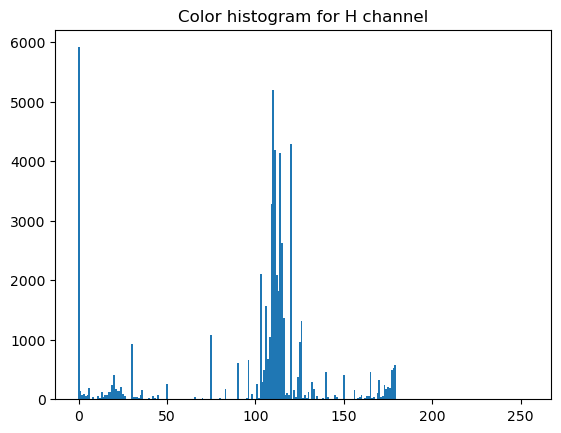

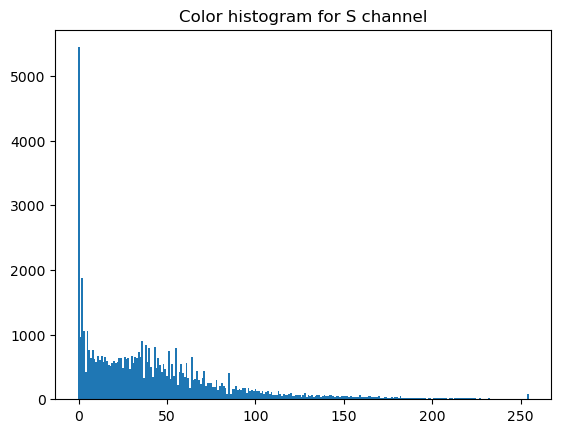

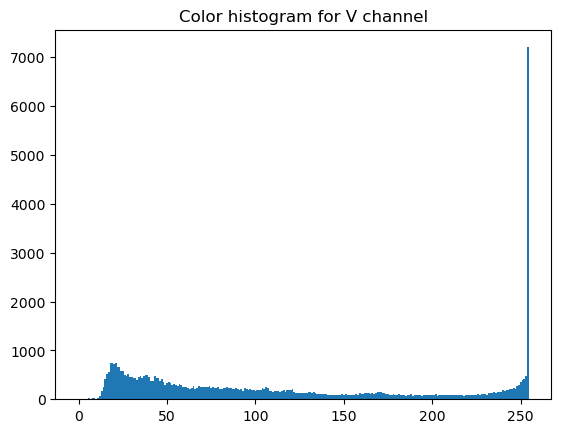

In [11]:
plot_mask_histograms_by_separate_channels(image, processed_masks[1], hsv_flag=True)

In [12]:
def compute_embeddings_by_separate_channels(
    rgb_img, moto_mask, hsv_flag=True,
    intervals_count=256
):
    image = rgb_img.copy()
    if hsv_flag:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        
    _, _, channels = image.shape
    
    color_embedding = np.zeros(intervals_count * channels)
    
    for channel_id in range(channels):
        H, bins = np.histogram(
            image[:, :, channel_id], bins=intervals_count - 1, range=(0,255),
            density=False, weights=moto_mask[:, :, channel_id]
        )
        pixels_in_mask = moto_mask[:, :, channel_id].sum()
        color_embedding[channel_id * intervals_count : (channel_id + 1) * intervals_count - 1] = H.astype(np.float32) / pixels_in_mask
        
    return color_embedding
        
color_embedding = compute_embeddings_by_separate_channels(image, processed_masks[1], hsv_flag=True)
print(f'color_embedding.shape: {color_embedding.shape}')
print(f'color_embedding: {color_embedding}')

color_embedding.shape: (768,)
color_embedding: [    0.10276   0.0024661   0.0013199   0.0014762  0.00085098   0.0012504   0.0032129  0.00019104  0.00078151   0.0001563  0.00019104   0.0010767  0.00024314   0.0020146  0.00078151   0.0013546   0.0013546   0.0022577   0.0020146   0.0041854   0.0070857   0.0029176   0.0023966   0.0023966   0.0034386   0.0015283
  0.00093781  0.00019104  0.00022577  0.00017367    0.016116  0.00053837  0.00069467  0.00052101  0.00048627   0.0013546   0.0026919   0.0001042  0.00022577  0.00012157  0.00024314  5.2101e-05  0.00085098   0.0003126           0    0.001233  1.7367e-05           0  5.2101e-05           0   0.0044633  8.6834e-05
  3.4734e-05           0           0  0.00017367  3.4734e-05           0           0           0  8.6834e-05           0           0  1.7367e-05           0  1.7367e-05  0.00062521           0  1.7367e-05           0   0.0002605           0           0  1.7367e-05           0    0.018721           0           0
           0  